# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the Data

In [2]:
df=pd.read_csv('kc.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df=df.drop(['id','date','waterfront'],axis=1)

# Visualisations

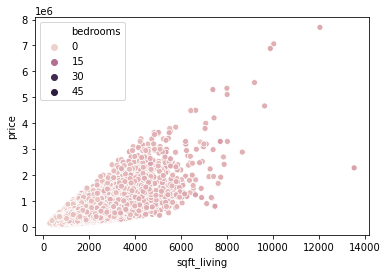

In [5]:
sns.scatterplot(x='sqft_living',y='price',data=df,hue='bedrooms')

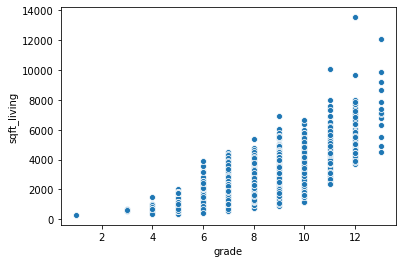

In [6]:
sns.scatterplot(x='grade',y='sqft_living',data=df)

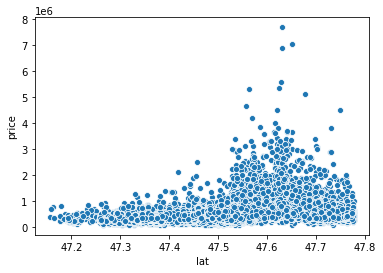

In [7]:
sns.scatterplot(x='lat',y='price',data=df)

In [8]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
target=df.price.values

In [10]:
df=df.drop('price',axis=1)

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Lasso Regression

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(df,target,test_size=0.2)

In [13]:
scaler=MinMaxScaler()

In [14]:
X_train_s=scaler.fit_transform(X_train)

In [15]:
X_test_s=scaler.fit_transform(X_test)

In [16]:
lasso=Lasso(alpha=0.2,max_iter=40000).fit(X_train_s,Y_train)

In [17]:
lasso_pred=lasso.predict(X_test_s)

In [18]:
print(lasso.coef_)

[-1239487.04578227   337504.82837883  1948054.34209245    54205.37488072
    15383.99017255   318928.7019255    108477.90928883  1112175.0954663
   374661.95023022        0.          -307141.54252958    53323.71906503
  -125141.6735519    375377.05501267  -280740.70812056   111686.38248902
  -260445.03865843]


In [19]:
colnames=df.columns

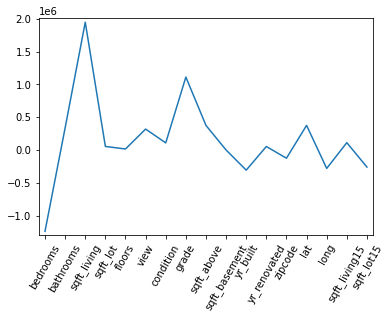

In [20]:
plt.plot(range(len(colnames)), lasso.coef_)
plt.xticks(range(len(colnames)), colnames.values, rotation=60) 
plt.margins(0.02)
plt.show()

In [21]:
np.sqrt(mean_squared_error(Y_test,lasso_pred))

395399.97699572984

#  Ridge Regression

In [22]:
from sklearn.linear_model import Ridge
ridge = Ridge(normalize=True).fit(X_train_s,Y_train)
rig_pred=ridge.predict(X_test_s)

In [23]:
np.sqrt(mean_squared_error(Y_test,rig_pred))

219657.7560932698

In [24]:
ridge.coef_

array([  74326.73000061,  291130.09997485,  760222.00688831,
         76505.19372605,   47446.83561666,  210252.01602495,
         81376.06061949,  581265.81595952,  497297.55501033,
        269280.59287929,  -98010.2549675 ,   70043.25115794,
         -9142.73244253,  207414.10168983, -124853.73766513,
        323187.15926325,  -14704.10632997])

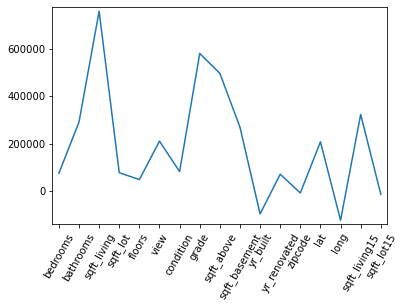

In [25]:
plt.plot(range(len(colnames)), ridge.coef_)
plt.xticks(range(len(colnames)), colnames.values, rotation=60) 
plt.margins(0.02)
plt.show()